In [1]:
import pandas as pd

In [2]:
# Bring the function to properly clean the data

def wrangle(filepath):
  df = pd.read_csv(filepath, sep="\t", low_memory=False)
  
  # Select the snacks 
  snacks = df[df["categories_tags"].str.contains("Snack", case=False, na=False)].copy()
  
  #drop the columns with > 20% missing
  max_drop = int(len(snacks) * 0.20)
  snacks.drop(columns=snacks.columns[snacks.isna().sum() > max_drop], inplace=True)
  
  # drop code, url & time columns
  snacks.drop(columns=[
    "code", "url", "created_t", "created_datetime", "last_modified_t", 
    "last_modified_datetime", "last_modified_by", "last_updated_t", "last_updated_datetime"
], inplace=True)
  
  # drop duplicate country & categorie columns
  snacks.drop(columns=["categories", "categories_tags", "countries", "countries_tags", "main_category", "states", "states_tags"], inplace=True)
  
  # drop the ingredients and serving columns
  snacks.drop(columns=["ingredients_text", "ingredients_tags", "ingredients_analysis_tags", "serving_size", "serving_quantity"], inplace=True)


  # Replace missing product & country names with "Unknown"
  snacks["product_name"]=snacks["product_name"].fillna("Unknown")
  snacks["countries_en"]=snacks["countries_en"].fillna("Unknown")

  # Replace nutriscore_grade's missing vale with unknown
  snacks["nutriscore_grade"]=snacks["nutriscore_grade"].fillna("unknown")

  # replace missing nova_group(food_processed) with the most common value (mode)
  snacks["nova_group"]=snacks["nova_group"].fillna(snacks["nova_group"].mode()[0])

  # reomve rows with energy_kcal_100g > 900  
  snacks = snacks[snacks["energy-kcal_100g"] <= 900]

  # reomve rows with energy_100g > 4000
  snacks = snacks[snacks["energy_100g"] <= 4000]

  # reomve rows with fat_100g > 100
  snacks = snacks[snacks["fat_100g"] <= 100]

  # Saturated Fat must be <= Total Fat
  # This removes rows where the math doesn't add up
  snacks = snacks[snacks["saturated-fat_100g"] <= snacks["fat_100g"]]

  # reomve rows with carbohydrates_100g > 100
  snacks=snacks[snacks["carbohydrates_100g"] <= 100]

  # reomve rows with sugars_100g > 100
  snacks=snacks[snacks["sugars_100g"] <= 100]

  # reomve rows with fiber_100g > 40
  snacks = snacks[snacks["fiber_100g"] <= 40]

  # reomve rows with proteins_100g > 100
  snacks = snacks[snacks["proteins_100g"] <= 100]

  # reomve rows with salt_100g > 100
  snacks= snacks[snacks["salt_100g"] <= 100]

  # reomve rows with fruits-vegetables-nuts-estimate-from-ingredients_100g > 100
  snacks = snacks[snacks["fruits-vegetables-nuts-estimate-from-ingredients_100g"] <= 100]

  # reomve rows with nutrition-score-fr_100g < -15 or > 40
  snacks = snacks[(snacks["nutrition-score-fr_100g"] >= -15) & (snacks["nutrition-score-fr_100g"] <= 40)]
  
  # handle na values for categoies_en for snacks and convert to lowercase
  snacks["categories_en"] = snacks["categories_en"].fillna("").str.lower()
  
  snacks = snacks.reset_index(drop=True)
  
  return snacks


In [3]:
df = wrangle("dataset_vs.csv")
df.head()

,creator,product_name,categories_en,countries_en,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,openfoodfacts-contributors,Madeleines ChocoLait,"snacks,sweet snacks,biscuits and cakes,cakes,c...",France,6.0,20.0,e,4.0,Sugary snacks,Biscuits and cakes,...,24.0,6.00,54.0,31.00,1.4,6.4,0.48,0.192,16.250000,20.0
1,openfoodfacts-contributors,Farandole de madeleine,"snacks,sweet snacks,biscuits and cakes,cakes,c...",Brazil,6.0,9.0,c,4.0,Sugary snacks,Biscuits and cakes,...,16.7,6.48,35.2,1.85,18.5,37.0,0.88,0.352,1.750000,9.0
2,openfoodfacts-contributors,Multi Patents Collagen Peptides,"snacks,sweet snacks,biscuits and cakes,cakes,m...",France,0.0,-1.0,a,3.0,Sugary snacks,Biscuits and cakes,...,0.0,0.00,0.0,9.09,0.0,90.9,0.00,0.000,0.251116,-1.0
3,openfoodfacts-contributors,Peanut Brittle,"snacks,sweet snacks,confectioneries",France,0.0,22.0,e,4.0,Sugary snacks,Sweets,...,3.9,2.50,72.1,51.50,1.9,7.7,0.00,0.000,30.000000,22.0
4,openfoodfacts-contributors,madeleine Bijou ChocoPÃ©pites,"snacks,sweet snacks,biscuits and cakes,cakes,m...",France,8.0,21.0,e,4.0,Sugary snacks,Biscuits and cakes,...,25.0,5.00,55.0,32.00,2.5,5.8,0.63,0.252,9.000000,21.0


In [4]:
df.isna().sum()


creator                                                  0
product_name                                             0
categories_en                                            0
countries_en                                             0
additives_n                                              0
nutriscore_score                                         0
nutriscore_grade                                         0
nova_group                                               0
pnns_groups_1                                            0
pnns_groups_2                                            0
states_en                                                0
nutrient_levels_tags                                     0
completeness                                             0
main_category_en                                         0
energy-kcal_100g                                         0
energy_100g                                              0
fat_100g                                                

In [5]:
def assign_category(row):
    # 1. Setup search text (Combine Category + Product Name)
    # We handle missing values (NaN) by treating them as empty strings
    cat_text = str(row['categories_en']).lower() if isinstance(row['categories_en'], str) else ""
    name_text = str(row['product_name']).lower() if isinstance(row['product_name'], str) else ""
    
    # normalize hyphens and combine
    t = (cat_text + " " + name_text).replace("-", " ")
    
    
    # LEVEL 1: Non Snack / Liquid / Meals
    # beverages
    if any(x in t for x in ['beverage', 'drink', 'juice', 'soda', 'water', 'tea', 'coffee', 'milk', 'latte']):
        return "Beverages"
    
    # supplements
    if any(x in t for x in ['supplement', 'vitamin', 'protein powder', 'capsule', 'whey']):
        return "Supplements"

    # meals & fresh food (lunch items)
    if any(x in t for x in ['pizza', 'sandwich', 'salad', 'meal', 'quiche', 'burger', 'pasta', 'soup', 'noodle']):
        return "Meals & Sandwiches"
    
    
    # LEVEL 2: High Protein & Fruits
    # Meat & Seafood
    if any(x in t for x in ['jerky', 'meat', 'beef', 'pork', 'chicken', 'fish', 'seafood', 'salami', 'ham', 'sausage', 'tuna']):
        return "Meat & Seafood"

    # Fruit & Veggie Snacks
    if any(x in t for x in ['apple compote', 'applesauce', 'fruit based', 'dried fruit', 'raisin', 'prune', 'apricot', 'vegetable', 'berry', 'seaweed']):
        return "Fruit & Veggie Snacks"

    # Nuts & Seeds
    if any(x in t for x in ['nut', 'seed', 'pistachio', 'almond', 'cashew', 'peanut', 'pecan', 'walnut', 'hazelnut', 'trail mix']):
        return "Nuts & Seeds"
        
    # Dairy & Fridge
    if any(x in t for x in ['dairy', 'yogurt', 'yoghurt', 'cheese', 'pudding', 'cream', 'refrigerated', 'butter']):
        return "Dairy & Fridge"


    # LEVEL 3: Salty
    # Chips & Popcorn
    if any(x in t for x in ['popcorn', 'chip', 'crisp', 'puff', 'fries', 'tortilla', 'corn snack', 'pretzel', 'doritos', 'pringles']):
        return "Chips & Popcorn"


    # LEVEL 4: Sweet
    # Breakfast & Cereal
    if any(x in t for x in ['cereal', 'muesli', 'oatmeal', 'oat', 'flake', 'breakfast', 'granola', 'porridge']):
        return "Breakfast & Cereals"

    # Bars
    if 'bar' in t:
        return "Energy & Cereal Bars"

    # Biscuits & Cakes
    if any(x in t for x in ['biscuit', 'cookie', 'cake', 'wafer', 'pastry', 'pie', 'tart', 'brownie', 'muffin', 'doughnut', 'waffle', 'macaron', 'madeleine', 'croissant']):
        return "Biscuits & Cakes"

    # Chocolates & Candies
    if any(x in t for x in ['chocolate', 'cocoa', 'candy', 'candies', 'gummi', 'gummy', 'marshmallow', 'confection', 'sweet', 'bonbon', 'jelly', 'fudge']):
        return "Chocolates & Candies"


    # LEVEL 5: The Fallbacks
    # Savory/Salty Misc
    if any(x in t for x in ['cracker', 'salty', 'salted', 'appetizer']):
        return "Savory & Salty Misc"

    # Plant-Based Misc
    if 'plant based' in t:
        return "Plant-Based Misc"

    # If it is just "Snacks" or "Other"
    return "Other Snacks"



In [6]:
df['high_level_category'] = df.apply(assign_category, axis=1)

# Check the distribution
print(len(df['high_level_category'].value_counts()))

14


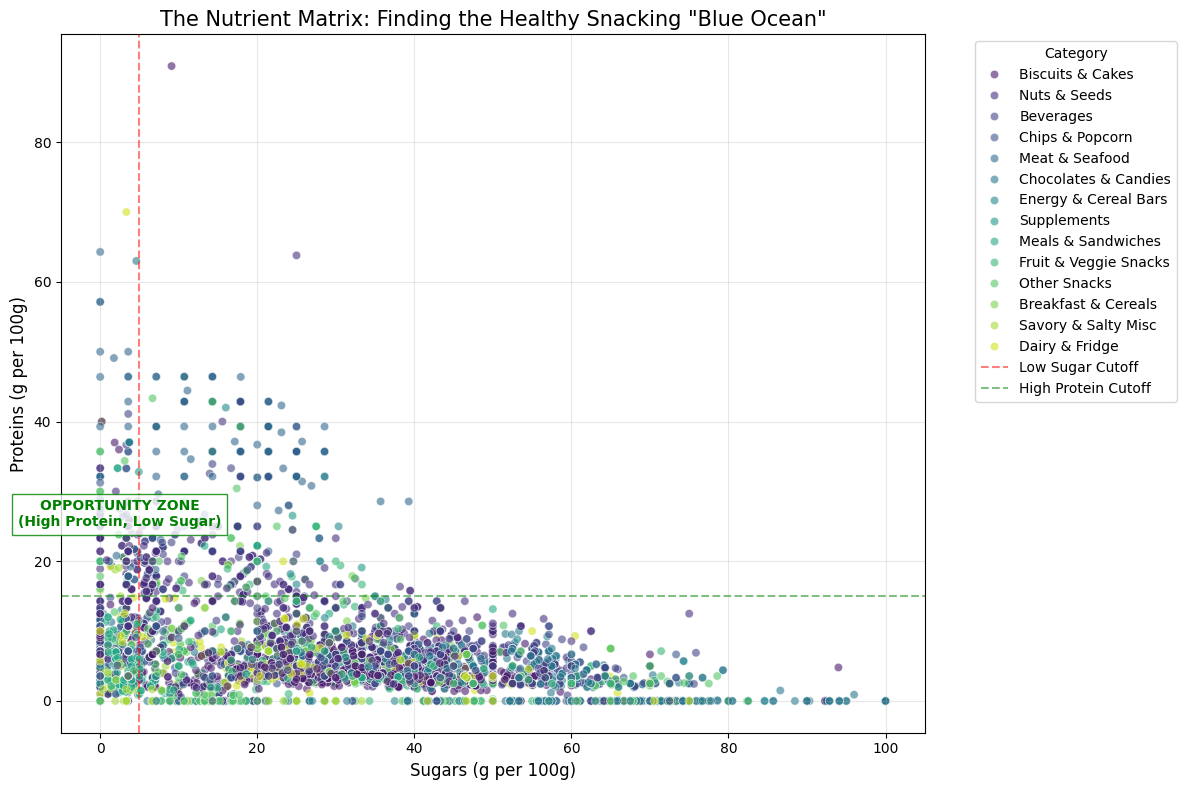

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Setup the data (Filter out impossible values/outliers for cleaner viz)
# Sugar and Protein > 100g is impossible. We also want to focus on the dense area.
plot_df = df[
    (df['sugars_100g'] >= 0) & 
    (df['sugars_100g'] <= 100) & 
    (df['proteins_100g'] >= 0) & 
    (df['proteins_100g'] <= 100)
].copy()

# 2. Define your Quadrant Thresholds (Adjust these based on your "Health" definition)
HIGH_PROTEIN_THRESHOLD = 15  # g
LOW_SUGAR_THRESHOLD = 5      # g

# 3. Create the Plot
plt.figure(figsize=(12, 8))

# Main Scatter plot
sns.scatterplot(
    data=plot_df,
    x='sugars_100g',
    y='proteins_100g',
    hue='high_level_category',  # Colors by your new buckets
    alpha=0.6,                  # Transparency helps see clusters
    palette='viridis'           # High contrast palette
)

# 4. Draw the Quadrant Lines
plt.axvline(x=LOW_SUGAR_THRESHOLD, color='red', linestyle='--', alpha=0.5, label='Low Sugar Cutoff')
plt.axhline(y=HIGH_PROTEIN_THRESHOLD, color='green', linestyle='--', alpha=0.5, label='High Protein Cutoff')

# 5. Highlight the "Empty Quadrant" (The Opportunity Zone)
# Top-Left Quadrant: Low Sugar (< 5g) AND High Protein (> 15g)
plt.text(
    x=LOW_SUGAR_THRESHOLD / 2, 
    y=HIGH_PROTEIN_THRESHOLD + 10, 
    s="OPPORTUNITY ZONE\n(High Protein, Low Sugar)", 
    color='green', 
    weight='bold', 
    ha='center',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='green')
)

# 6. Formatting
plt.title('The Nutrient Matrix: Finding the Healthy Snacking "Blue Ocean"', fontsize=15)
plt.xlabel('Sugars (g per 100g)', fontsize=12)
plt.ylabel('Proteins (g per 100g)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Category")
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

In [14]:
# 1. Create a "Safe Sugar" column to avoid dividing by zero (0 -> 0.1)
df['safe_sugar'] = df['sugars_100g'].replace(0, 0.1)

# 2. Calculate the Ratio
df['protein_sugar_ratio'] = df['proteins_100g'] / df['safe_sugar']

df.head()

,creator,product_name,categories_en,countries_en,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,high_level_category,safe_sugar,protein_sugar_ratio
0,openfoodfacts-contributors,Madeleines ChocoLait,"snacks,sweet snacks,biscuits and cakes,cakes,c...",France,6.0,20.0,e,4.0,Sugary snacks,Biscuits and cakes,...,31.00,1.4,6.4,0.48,0.192,16.250000,20.0,Biscuits & Cakes,31.00,0.206452
1,openfoodfacts-contributors,Farandole de madeleine,"snacks,sweet snacks,biscuits and cakes,cakes,c...",Brazil,6.0,9.0,c,4.0,Sugary snacks,Biscuits and cakes,...,1.85,18.5,37.0,0.88,0.352,1.750000,9.0,Biscuits & Cakes,1.85,20.000000
2,openfoodfacts-contributors,Multi Patents Collagen Peptides,"snacks,sweet snacks,biscuits and cakes,cakes,m...",France,0.0,-1.0,a,3.0,Sugary snacks,Biscuits and cakes,...,9.09,0.0,90.9,0.00,0.000,0.251116,-1.0,Biscuits & Cakes,9.09,10.000000
3,openfoodfacts-contributors,Peanut Brittle,"snacks,sweet snacks,confectioneries",France,0.0,22.0,e,4.0,Sugary snacks,Sweets,...,51.50,1.9,7.7,0.00,0.000,30.000000,22.0,Nuts & Seeds,51.50,0.149515
4,openfoodfacts-contributors,madeleine Bijou ChocoPÃ©pites,"snacks,sweet snacks,biscuits and cakes,cakes,m...",France,8.0,21.0,e,4.0,Sugary snacks,Biscuits and cakes,...,32.00,2.5,5.8,0.63,0.252,9.000000,21.0,Biscuits & Cakes,32.00,0.181250
